# Import lb

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import accuracy_score,r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split

# Data Gathering

In [2]:
df=pd.read_csv(r"E:\10.python\project\project2\house-prices-advanced-regression-techniques\train.csv")
df.drop('Id',axis=1,inplace=True)
X_train=df.drop('SalePrice',axis=1)

In [3]:
X_test=pd.read_csv(r"E:\10.python\project\project2\house-prices-advanced-regression-techniques\test.csv")
X_test.drop('Id',axis=1,inplace=True)

In [4]:
# dfx=X_train.append(X_test)
# dfx

In [5]:
y=df['SalePrice']
y.isnull().sum()

0

In [252]:
# y

# EDA

<AxesSubplot:>

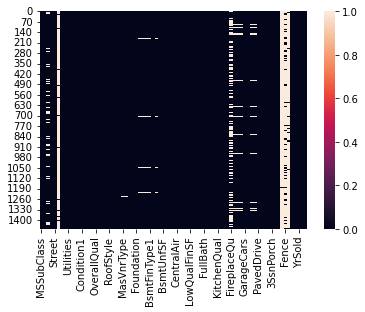

In [6]:
sns.heatmap(X_train.isnull())

In [7]:
null_mean=X_train.isnull().mean()*100
print(null_mean.to_string())
feature_50_perct_null=[var for var in X_train.columns if  null_mean[var]>50]
print(feature_50_perct_null)

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
T

 <font color='Red'> Remarks- if more than 50% null value in columns it is drop  </font>

In [8]:
X_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

# 1.'MSSubClass'

In [9]:
X_train['MSSubClass']

0       60
1       20
2       60
3       70
4       60
        ..
1455    60
1456    20
1457    70
1458    20
1459    20
Name: MSSubClass, Length: 1460, dtype: int64

In [10]:
X_train['MSSubClass'].isnull().sum()

0

In [11]:
X_train['MSSubClass'].value_counts().sort_index(axis=0)

20     536
30      69
40       4
45      12
50     144
60     299
70      60
75      16
80      58
85      20
90      52
120     87
160     63
180     10
190     30
Name: MSSubClass, dtype: int64

# 'MSZoning'

In [12]:
X_train['MSZoning']

0       RL
1       RL
2       RL
3       RL
4       RL
        ..
1455    RL
1456    RL
1457    RL
1458    RL
1459    RL
Name: MSZoning, Length: 1460, dtype: object

In [13]:
X_train['MSZoning'].isnull().sum()

0

In [14]:
X_train['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [15]:
X_train.groupby('MSZoning').get_group('C (all)')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
30,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal
88,50,C (all),105.0,8470,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,MnPrv,NaN,0,10,2009,ConLD,Abnorml
93,190,C (all),60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Corner,...,99,0,NaN,NaN,NaN,0,11,2007,WD,Normal
495,30,C (all),60.0,7879,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,GdWo,NaN,0,11,2009,WD,Abnorml
557,50,C (all),60.0,11040,Pave,NaN,Reg,Low,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,COD,Normal
711,50,C (all),66.0,8712,Pave,Pave,Reg,HLS,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,1,2010,WD,Abnorml
812,20,C (all),66.0,8712,Grvl,NaN,Reg,Bnk,AllPub,Inside,...,0,0,NaN,NaN,Shed,54,6,2010,WD,Alloca
916,20,C (all),50.0,9000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,10,2006,WD,Abnorml
1061,30,C (all),120.0,18000,Grvl,NaN,Reg,Low,AllPub,Inside,...,0,0,NaN,NaN,Shed,560,8,2008,ConLD,Normal
1279,50,C (all),60.0,7500,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2010,COD,Abnorml


In [16]:
X_train.loc[X_train['MSZoning']=='C (all)']

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
30,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal
88,50,C (all),105.0,8470,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,MnPrv,NaN,0,10,2009,ConLD,Abnorml
93,190,C (all),60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Corner,...,99,0,NaN,NaN,NaN,0,11,2007,WD,Normal
495,30,C (all),60.0,7879,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,GdWo,NaN,0,11,2009,WD,Abnorml
557,50,C (all),60.0,11040,Pave,NaN,Reg,Low,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,COD,Normal
711,50,C (all),66.0,8712,Pave,Pave,Reg,HLS,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,1,2010,WD,Abnorml
812,20,C (all),66.0,8712,Grvl,NaN,Reg,Bnk,AllPub,Inside,...,0,0,NaN,NaN,Shed,54,6,2010,WD,Alloca
916,20,C (all),50.0,9000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,10,2006,WD,Abnorml
1061,30,C (all),120.0,18000,Grvl,NaN,Reg,Low,AllPub,Inside,...,0,0,NaN,NaN,Shed,560,8,2008,ConLD,Normal
1279,50,C (all),60.0,7500,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2010,COD,Abnorml


# 'LotFrontage'

In [17]:
X_train['LotFrontage'].isnull().sum()

259

In [18]:
X_mean=X_train['LotFrontage'].mean()
X_train['LotFrontage'].fillna(X_mean,inplace=True)

In [19]:
X_train['LotFrontage'].isnull().sum()

0

C:\Users\91703\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91703\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LotFrontage', ylabel='Density'>

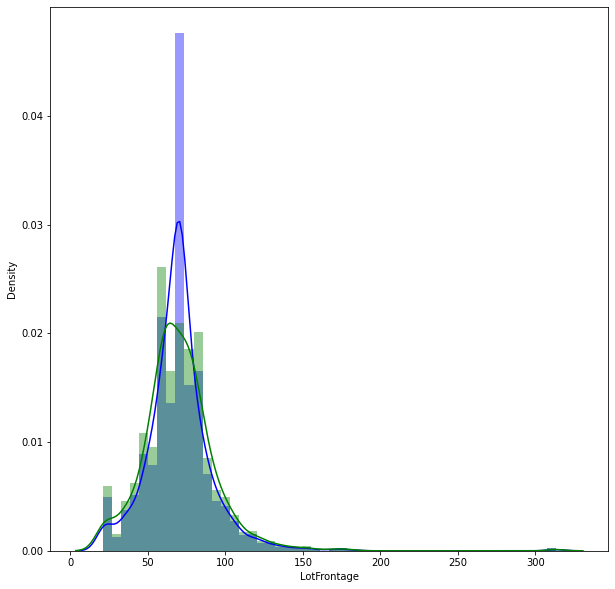

In [20]:
plt.figure(figsize=(10,10))
sns.distplot(X_train['LotFrontage'],color='blue')
sns.distplot(df['LotFrontage'],color='green')

In [21]:
X_train['LotFrontage'].describe()

count    1460.000000
mean       70.049958
std        22.024023
min        21.000000
25%        60.000000
50%        70.049958
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [22]:
sns.scatterplot(X_train['LotFrontage'],y_train)

NameError: name 'y_train' is not defined

 <font color='Red'>  **Remarks-Outliers present <font color='Blue'> LotFrontage </font> column** </font>

# 'LotArea'

In [ ]:
X_train['LotArea'].describe()

In [ ]:
X_train['LotArea'].isnull().sum()

In [ ]:
sns.scatterplot(X_train['LotArea'],y_train)

In [ ]:
Outliers present is this columns

 <font color='Red'>  **Remarks-Outliers present <font color='Blue'>'LotArea' </font> column** </font>

# 'Street'

In [ ]:
X_train['Street']

In [ ]:
X_train['Street'].isnull().sum()

In [ ]:
X_train['Street'].value_counts()

# Alley

In [23]:
X_train['Alley'].isnull().mean()*100

93.76712328767123

 <font color='Red'>  **93.76% data missing** </font>

# 'LotShape'

In [24]:
X_train['LotShape'].isnull().mean()*100

0.0

In [25]:
X_train['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

 <font color='green'>  **ordinal variables present in columns we use ordinal encoding** </font>

# LandContour

In [26]:
X_train['LandContour'].isnull().mean()*100

0.0

In [27]:
X_train['LandContour'].value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

# Utilities

In [28]:
X_train['Utilities'].isnull().mean()*100

0.0

In [29]:
X_train['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

 <font color='Red'>  **two unique value not prsent in data** </font>

## LotConfig

In [30]:
X_train['LotConfig']

0       Inside
1          FR2
2       Inside
3       Corner
4          FR2
         ...  
1455    Inside
1456    Inside
1457    Inside
1458    Inside
1459    Inside
Name: LotConfig, Length: 1460, dtype: object

In [31]:
X_train['LotConfig'].isnull().sum()

0

In [32]:
X_train['LotConfig'].value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

# LandSlope

In [33]:
X_train['LandSlope']

0       Gtl
1       Gtl
2       Gtl
3       Gtl
4       Gtl
       ... 
1455    Gtl
1456    Gtl
1457    Gtl
1458    Gtl
1459    Gtl
Name: LandSlope, Length: 1460, dtype: object

In [34]:
X_train['LandSlope'].isnull().sum()

0

In [35]:
X_train['LandSlope'].value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

 <font color='green'>  **ordinal varible in this columns** </font>

# Neighborhood

In [36]:
X_train['Neighborhood'].isnull().sum()

0

In [37]:
X_train['Neighborhood'].value_counts().sort_index(axis=0)

Blmngtn     17
Blueste      2
BrDale      16
BrkSide     58
ClearCr     28
CollgCr    150
Crawfor     51
Edwards    100
Gilbert     79
IDOTRR      37
MeadowV     17
Mitchel     49
NAmes      225
NPkVill      9
NWAmes      73
NoRidge     41
NridgHt     77
OldTown    113
SWISU       25
Sawyer      74
SawyerW     59
Somerst     86
StoneBr     25
Timber      38
Veenker     11
Name: Neighborhood, dtype: int64

 <font color='green'>  **label data in this columns** </font>

# Condition1

In [38]:
b=X_train['Condition1']

In [39]:
X_train['Condition1'].isnull().sum()

0

In [40]:
X_train['Condition1'].value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

# Condition2

In [41]:
X_train['Condition2']

0       Norm
1       Norm
2       Norm
3       Norm
4       Norm
        ... 
1455    Norm
1456    Norm
1457    Norm
1458    Norm
1459    Norm
Name: Condition2, Length: 1460, dtype: object

In [42]:
X_train['Condition2'].isnull().sum()

0

In [43]:
X_train['Condition2'].value_counts()

Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

# BldgType

In [45]:
df['BldgType']

0       1Fam
1       1Fam
2       1Fam
3       1Fam
4       1Fam
        ... 
1455    1Fam
1456    1Fam
1457    1Fam
1458    1Fam
1459    1Fam
Name: BldgType, Length: 1460, dtype: object

In [46]:
df['BldgType'].value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [47]:
# plt.figure(figsize=(25,25))
# sns.heatmap(df.corr(),annot=True)

In [48]:
df.select_dtypes(include='O')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [49]:
null=df.isnull().mean()*100

In [50]:
null_col=[var for var in df.columns if null[var]>20]

In [51]:
df.drop(null_col,axis=1,inplace=True)

In [52]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [53]:
df.select_dtypes(include='O')

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,FuseA,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


In [54]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [55]:
X_train['Alley'].isnull().sum()

1369

In [56]:
X_train['Alley'].fillna('NA',inplace=True)
X_test['Alley'].fillna('NA',inplace=True)

In [57]:
X_train['Alley'].isnull().sum()

0

In [58]:
X_test['Alley'].isnull().sum()

0

In [59]:
X_train['MasVnrType'].isnull().sum()

8

In [60]:
X_train['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [61]:
X_train['MasVnrType'].fillna(X_train['MasVnrType'].mode()[0],inplace=True)

In [62]:
X_test['MasVnrType'].fillna(X_train['MasVnrType'].mode()[0],inplace=True)

In [63]:
X_train['MasVnrType'].isnull().sum()

0

In [64]:
X_test['MasVnrType'].isnull().sum()

0

In [65]:
X_train['GarageType'].isnull().sum()

81

In [66]:
X_train['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [67]:
X_train['GarageType'].fillna('No Garage',inplace=True)
X_test['GarageType'].fillna('No Garage',inplace=True)

In [68]:
X_train['GarageType'].isnull().sum()
X_test['GarageType'].isnull().sum()

0

In [69]:
X_test['GarageType'].value_counts()

Attchd       853
Detchd       392
BuiltIn       98
No Garage     76
Basment       17
2Types        17
CarPort        6
Name: GarageType, dtype: int64

In [70]:
X_train['MiscFeature'].isnull().sum()

1406

In [71]:
X_train['MiscFeature'].fillna('None',inplace=True)
X_test['MiscFeature'].fillna('None',inplace=True)

In [72]:
X_train['MiscFeature'].isnull().sum()

0

In [73]:
X_train['LotFrontage'].isna().sum()  

0

In [74]:
X_train['LotFrontage'].fillna(X_train['LotFrontage'].median(),inplace=True)
X_test['LotFrontage'].fillna(X_train['LotFrontage'].median(),inplace=True)

# MSZoning

In [75]:
X_test['MSZoning'].fillna(X_train['MSZoning'].mode()[0],inplace=True)

# SaleType

In [76]:
X_train['SaleType'].isna().sum() 

0

In [77]:
X_test['SaleType'].fillna(X_train['SaleType'].mode()[0],inplace=True)

# Feature engg

In [78]:
X_train['Fence'].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [79]:
X_test['Fence'].unique()

array(['MnPrv', nan, 'GdPrv', 'GdWo', 'MnWw'], dtype=object)

# Fence

In [80]:
X_train['Fence'].replace({'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1,np.nan:0},inplace=True)
X_test['Fence'].replace({'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1,np.nan:0},inplace=True)

In [81]:
X_train['Fence']=X_train['Fence'].astype('int')
X_test['Fence']=X_test['Fence'].astype('int')

In [82]:
X_train['Fence'].value_counts()

0    1179
3     157
4      59
2      54
1      11
Name: Fence, dtype: int64

# PoolQC

In [83]:
X_train['PoolQC'].unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [84]:
X_test['PoolQC'].unique()

array([nan, 'Ex', 'Gd'], dtype=object)

In [85]:
X_train['PoolQC'].replace({'Ex':4,'Gd':3,'TA':2,'Fa':1,np.nan:0},inplace=True)
X_test['PoolQC'].replace({'Ex':4,'Gd':3,'TA':2,'Fa':1,np.nan:0},inplace=True)

In [86]:
X_train['PoolQC']=X_train['PoolQC'].astype('int')
X_test['PoolQC']=X_test['PoolQC'].astype('int')

# GarageCond

In [87]:
X_train['GarageCond'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [88]:
X_test['GarageCond'].unique()

array(['TA', nan, 'Fa', 'Gd', 'Po', 'Ex'], dtype=object)

In [89]:
X_train['GarageCond'].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,np.nan:0},inplace=True)
X_test['GarageCond'].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,np.nan:0},inplace=True)

In [90]:
X_train['GarageCond']=X_train['GarageCond'].astype('int')
X_test['GarageCond']=X_test['GarageCond'].astype('int')

# GarageQual

In [91]:
X_train['GarageQual'].unique()

array(['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'], dtype=object)

In [92]:
X_test['GarageQual'].unique()

array(['TA', nan, 'Fa', 'Gd', 'Po'], dtype=object)

In [93]:
X_train['GarageQual'].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,np.nan:0},inplace=True)
X_test['GarageQual'].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,np.nan:0},inplace=True)

In [94]:
X_train['GarageQual']=X_train['GarageQual'].astype('int')
X_test['GarageQual']=X_test['GarageQual'].astype('int')

# GarageFinish

In [95]:
X_train['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [96]:
X_test['GarageFinish'].value_counts()

Unf    625
RFn    389
Fin    367
Name: GarageFinish, dtype: int64

In [97]:
X_train['GarageFinish'].replace({'Fin':3,'RFn':2,'Unf':1,np.nan:0},inplace=True)
X_test['GarageFinish'].replace({'Fin':3,'RFn':2,'Unf':1,np.nan:0},inplace=True)

In [98]:
X_train['GarageFinish']=X_train['GarageFinish'].astype('int')
X_test['GarageFinish']=X_test['GarageFinish'].astype('int')

# FireplaceQu

In [99]:
X_train['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [100]:
X_test['FireplaceQu'].value_counts()

Gd    364
TA    279
Fa     41
Po     26
Ex     19
Name: FireplaceQu, dtype: int64

In [101]:
X_train['FireplaceQu'].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,np.nan:0},inplace=True)
X_test['FireplaceQu'].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,np.nan:0},inplace=True)

In [102]:
X_train['FireplaceQu']=X_train['FireplaceQu'].astype('int')
X_test['FireplaceQu']=X_test['FireplaceQu'].astype('int')

In [103]:
X_train['FireplaceQu']

0       0
1       3
2       3
3       4
4       3
       ..
1455    3
1456    3
1457    4
1458    0
1459    0
Name: FireplaceQu, Length: 1460, dtype: int32

In [104]:
X_test['FireplaceQu']

0       0
1       0
2       3
3       4
4       0
       ..
1454    0
1455    0
1456    3
1457    0
1458    3
Name: FireplaceQu, Length: 1459, dtype: int32

## KitchenQual

In [105]:
X_train['KitchenQual'].isnull().sum()

0

In [106]:
X_test['KitchenQual'].value_counts()

TA    757
Gd    565
Ex    105
Fa     31
Name: KitchenQual, dtype: int64

In [107]:
X_test['KitchenQual'].fillna(X_test['KitchenQual'].mode()[0],inplace=True)

In [108]:
X_train['KitchenQual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [109]:
X_test['KitchenQual'].unique()

array(['TA', 'Gd', 'Ex', 'Fa'], dtype=object)

In [110]:
X_train['KitchenQual'].replace({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0},inplace=True)
X_test['KitchenQual'].replace({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0},inplace=True)

       Ex	Excellent  >> 4
       Gd	Good   >>3
       TA	Typical/Average >>2
       Fa	Fair    >>1
       Po	Poor    >>0

In [111]:
X_train['KitchenQual']=X_train['KitchenQual'].astype('int')
X_test['KitchenQual']=X_test['KitchenQual'].astype('int')

# HeatingQC

In [112]:
X_test['HeatingQC']

0       TA
1       TA
2       Gd
3       Ex
4       Ex
        ..
1454    Gd
1455    TA
1456    Ex
1457    TA
1458    Ex
Name: HeatingQC, Length: 1459, dtype: object

In [113]:
X_test['HeatingQC'].isnull().sum()

0

In [114]:
        Ex	Excellent  >> 4
       Gd	Good        >>3
       TA	Average/Typical >>2
       Fa	Fair   >>1
       Po	Poor   >>0

SyntaxError: invalid syntax (Temp/ipykernel_7288/2643220239.py, line 1)

In [115]:
X_train['HeatingQC'].replace({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0},inplace=True)
X_test['HeatingQC'].replace({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0},inplace=True)

In [116]:
X_train['HeatingQC']=X_train['HeatingQC'].astype('int')
X_test['HeatingQC']=X_test['HeatingQC'].astype('int')

# BsmtFinType2

In [117]:
GLQ	Good Living Quarters  >> 6
       ALQ	Average Living Quarters  >>5
       BLQ	Below Average Living Quarters	 >>4
       Rec	Average Rec Room  >>3
       LwQ	Low Quality  >>2
       Unf	Unfinshed   >>1
       NA	No Basement  >>0

SyntaxError: invalid syntax (Temp/ipykernel_7288/3137757629.py, line 1)

In [118]:
X_train['BsmtFinType2'].isnull().sum()

38

In [119]:
X_train['BsmtFinType2'].replace({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1 ,np.nan:0},inplace=True)
X_test['BsmtFinType2'].replace({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1 ,np.nan:0},inplace=True)

In [120]:
X_train['BsmtFinType2']=X_train['BsmtFinType2'].astype('int')
X_test['BsmtFinType2']=X_test['BsmtFinType2'].astype('int')

## BsmtFinType1

In [121]:
 GLQ	Good Living Quarters  >>6
       ALQ	Average Living Quarters >>5
       BLQ	Below Average Living Quarters	  >>4
       Rec	Average Rec Room  >>3
       LwQ	Low Quality   >>2
       Unf	Unfinshed   >>1
       NA	No Basement  >>0

SyntaxError: invalid syntax (Temp/ipykernel_7288/590616557.py, line 1)

In [122]:
X_train['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [123]:
X_test['BsmtFinType1'].unique()

array(['Rec', 'ALQ', 'GLQ', 'Unf', 'BLQ', 'LwQ', nan], dtype=object)

In [124]:
X_train['BsmtFinType1'].replace({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1 ,np.nan:0},inplace=True)
X_test['BsmtFinType1'].replace({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1 ,np.nan:0},inplace=True)

In [125]:
X_train['BsmtFinType1']=X_train['BsmtFinType1'].astype('int')
X_test['BsmtFinType1']=X_test['BsmtFinType1'].astype('int')

# BsmtExposure

In [126]:
Gd	Good Exposure   >>4
Av	Average Exposure (split levels or foyers typically score average or above)	 >3
Mn	Mimimum Exposure  >>2
No	No Exposure    >>1
NA	No Basement >>0

SyntaxError: invalid syntax (Temp/ipykernel_7288/2666318936.py, line 1)

In [127]:
X_train['BsmtExposure'].replace({'Gd':4,'Av':3,'Mn':2,'No':1,np.nan:0},inplace=True)
X_test['BsmtExposure'].replace({'Gd':4,'Av':3,'Mn':2,'No':1,np.nan:0},inplace=True)

In [128]:
X_train['BsmtExposure']=X_train['BsmtExposure'].astype('int')
X_test['BsmtExposure']=X_test['BsmtExposure'].astype('int')

# BsmtCond

In [129]:

       Ex	Excellent    >>5
       Gd	Good           >>4
       TA	Typical - slight dampness allowed  >>3
       Fa	Fair - dampness or some cracking or settling  >>2
       Po	Poor - Severe cracking, settling, or wetness   >>1
       NA	No Basement                       >>0
	

SyntaxError: invalid syntax (Temp/ipykernel_7288/2990834506.py, line 1)

In [130]:
X_train['BsmtCond'].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,np.nan:0},inplace=True)
X_test['BsmtCond'].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,np.nan:0},inplace=True)

In [131]:
X_train['BsmtCond']=X_train['BsmtCond'].astype('int')
X_test['BsmtCond']=X_test['BsmtCond'].astype('int')

In [132]:
X_test['BsmtCond']

0       3
1       3
2       3
3       3
4       3
       ..
1454    3
1455    3
1456    3
1457    3
1458    3
Name: BsmtCond, Length: 1459, dtype: int32

# BsmtQual

In [133]:
      Ex	Excellent (100+ inches)	 >>5
       Gd	Good (90-99 inches)  >>4
       TA	Typical (80-89 inches) >>3
       Fa	Fair (70-79 inches) >>2
       Po	Poor (<70 inches  >>1
       NA	No Basement  >>0

SyntaxError: invalid syntax (Temp/ipykernel_7288/1818696448.py, line 1)

In [134]:
X_train['BsmtQual'].value_counts().to_dict()

{'TA': 649, 'Gd': 618, 'Ex': 121, 'Fa': 35}

In [135]:
X_train['BsmtQual'].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,np.nan:0},inplace=True)
X_test['BsmtQual'].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,np.nan:0},inplace=True)

In [136]:
X_train['BsmtQual']=X_train['BsmtQual'].astype('int')
X_test['BsmtQual']=X_test['BsmtQual'].astype('int')

# ExterCond

In [137]:
Ex	Excellent  >>4
       Gd	Good     >>3
       TA	Average/Typical >>2
       Fa	Fair  >>1
       Po	Poor  >>0

SyntaxError: invalid syntax (Temp/ipykernel_7288/2663864261.py, line 1)

In [138]:
X_train['ExterCond'].isnull().sum()

0

In [139]:
X_train['ExterCond'].replace({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0},inplace=True)
X_test['ExterCond'].replace({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0},inplace=True)

In [140]:
X_train['ExterCond']=X_train['ExterCond'].astype('int')
X_test['ExterCond']=X_test['ExterCond'].astype('int')

# ExterQual

In [141]:
Ex	Excellent  >>4
       Gd	Good  >>3
       TA	Average/Typical >>2
       Fa	Fair  >>1
       Po	Poor  >>0

SyntaxError: invalid syntax (Temp/ipykernel_7288/363266737.py, line 1)

In [142]:
X_test['ExterQual'].isnull().sum()

0

In [143]:
X_train['ExterQual'].replace({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0},inplace=True)
X_test['ExterQual'].replace({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0},inplace=True)

In [144]:
X_train['ExterQual']=X_train['ExterQual'].astype('int')
X_test['ExterQual']=X_test['ExterQual'].astype('int')

# OverallCond

In [145]:
 10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor

SyntaxError: invalid syntax (Temp/ipykernel_7288/1933732218.py, line 1)

# LotShape

In [146]:
       Reg	Regular	  >>3
       IR1	Slightly irregular  >>2
       IR2	Moderately Irregular >>1
       IR3	Irregular  >>0

SyntaxError: invalid syntax (Temp/ipykernel_7288/338989925.py, line 1)

In [147]:
X_train['LotShape'].replace({'Reg':3,'IR1':2,'IR2':1,'IR3':0},inplace=True)
X_test['LotShape'].replace({'Reg':3,'IR1':2,'IR2':1,'IR3':0},inplace=True)

In [148]:
X_train['LotShape']=X_train['LotShape'].astype('int')
X_test['LotShape']=X_test['LotShape'].astype('int')

In [149]:
ns=X_test.isnull().sum()
ns

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 79, dtype: int64

In [150]:
X_test.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [151]:
na_value=[var for var in X_test.columns if ns[var]>=1 ]
na_value

['Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'Functional',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea']

In [152]:
print(X_train.isnull().sum().sum())

90


In [153]:
X_train['GarageYrBlt'].fillna(X_train['GarageYrBlt'].mean(),inplace=True)
X_test['GarageYrBlt'].fillna(X_train['GarageYrBlt'].mean(),inplace=True)

In [154]:
Electrical

NameError: name 'Electrical' is not defined

In [155]:
X_train['Electrical']   #.isna().sum()

0       SBrkr
1       SBrkr
2       SBrkr
3       SBrkr
4       SBrkr
        ...  
1455    SBrkr
1456    SBrkr
1457    SBrkr
1458    FuseA
1459    SBrkr
Name: Electrical, Length: 1460, dtype: object

In [156]:
X_train['Electrical'].fillna(X_train['Electrical'].mode()[0],inplace=True)
X_test['Electrical'].fillna(X_train['Electrical'].mode()[0],inplace=True)

In [157]:
# MasVnrArea

In [158]:
X_train['MasVnrArea'].value_counts()

0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 327, dtype: int64

In [159]:
X_train['MasVnrArea'].fillna(X_train['MasVnrArea'].median(),inplace=True)
X_test['MasVnrArea'].fillna(X_train['MasVnrArea'].median(),inplace=True)

In [160]:
na_value

['Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'Functional',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea']

In [161]:
X_test['Utilities'].isna().sum()

2

In [162]:
X_test['Utilities'].mode()[0]

'AllPub'

In [163]:
X_test['Utilities'].fillna(X_train['Utilities'].mode()[0],inplace=True)

In [164]:
X_test['Exterior1st']

0       VinylSd
1       Wd Sdng
2       VinylSd
3       VinylSd
4       HdBoard
         ...   
1454    CemntBd
1455    CemntBd
1456    VinylSd
1457    HdBoard
1458    HdBoard
Name: Exterior1st, Length: 1459, dtype: object

In [165]:
X_test['Exterior1st'].isna().sum()

1

In [166]:
X_test['Exterior1st'].fillna(X_train['Exterior1st'].mode()[0],inplace=True)

In [167]:
Exterior2nd

NameError: name 'Exterior2nd' is not defined

In [168]:
X_test['Exterior2nd']

0       VinylSd
1       Wd Sdng
2       VinylSd
3       VinylSd
4       HdBoard
         ...   
1454    CmentBd
1455    CmentBd
1456    VinylSd
1457    Wd Shng
1458    HdBoard
Name: Exterior2nd, Length: 1459, dtype: object

In [169]:
X_test['Exterior2nd'].isna().sum()

1

In [170]:
X_test['Exterior2nd'].fillna(X_train['Exterior2nd'].mode()[0],inplace=True)

In [171]:
# BsmtFinSF1

In [172]:
X_test['BsmtFinSF1'].median()

350.5

In [173]:
X_test['BsmtFinSF1'].fillna(X_test['BsmtFinSF1'].median(),inplace=True)

In [174]:
# BsmtFinSF2

In [175]:
X_test['BsmtFinSF2'].mean()

52.61934156378601

In [176]:
X_test['BsmtFinSF2'].value_counts()

0.0      1278
483.0       3
162.0       3
294.0       3
144.0       2
         ... 
110.0       1
186.0       1
449.0       1
48.0        1
344.0       1
Name: BsmtFinSF2, Length: 161, dtype: int64

In [177]:
X_test['BsmtFinSF2'].fillna(X_test['BsmtFinSF2'].mean(),inplace=True)

In [178]:
na_value=[var for var in X_test.columns if ns[var]>=1 ]
na_value

['Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'Functional',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea']

In [179]:
X_test['BsmtUnfSF'].mean()

554.2949245541838

In [180]:
X_test['BsmtUnfSF'].median()

460.0

In [181]:
X_test['BsmtUnfSF'].fillna(X_test['BsmtUnfSF'].median(),inplace=True)

In [182]:
TotalBsmtSF

NameError: name 'TotalBsmtSF' is not defined

In [183]:
X_test['TotalBsmtSF'].mean()

1046.1179698216736

In [184]:
X_test['TotalBsmtSF'].median()

988.0

In [185]:
X_test['TotalBsmtSF'].fillna(X_test['TotalBsmtSF'].median(),inplace=True)

In [186]:
BsmtFullBath

NameError: name 'BsmtFullBath' is not defined

In [187]:
X_test['BsmtFullBath'].median()

0.0

In [188]:
X_test['BsmtFullBath'].fillna(X_test['BsmtFullBath'].median(),inplace=True)

In [189]:
BsmtHalfBath

NameError: name 'BsmtHalfBath' is not defined

In [190]:
X_test['BsmtHalfBath'].median()

0.0

In [191]:
X_test['BsmtHalfBath'].fillna(X_test['BsmtHalfBath'].median(),inplace=True)

In [192]:
Functional

NameError: name 'Functional' is not defined

In [193]:
X_test['Functional'].mode()[0]

'Typ'

In [194]:
X_test['Functional'].fillna(X_test['Functional'].mode()[0],inplace=True)

In [195]:
GarageCars

NameError: name 'GarageCars' is not defined

In [196]:
X_test['GarageCars'].mean()

1.7661179698216736

In [197]:
X_test['GarageCars'].median()

2.0

In [198]:
X_test['GarageCars'].fillna(X_test['GarageCars'].median(),inplace=True)

In [199]:
GarageArea

NameError: name 'GarageArea' is not defined

In [200]:
X_test['GarageArea'].mean()

472.76886145404666

In [201]:
X_test['GarageArea'].median()

480.0

In [202]:
X_test['GarageArea'].fillna(X_test['GarageArea'].median(),inplace=True)

In [203]:
X_test.isnull().sum().sum()

0

In [204]:
X_train.isnull().sum().sum()

0

In [205]:
Cat_col1=X_train.select_dtypes(include='O')
lista=Cat_col1.columns.copy()
lista

Index(['MSZoning', 'Street', 'Alley', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical',
       'Functional', 'GarageType', 'PavedDrive', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [206]:
Cat_col2=X_test.select_dtypes(include='O')
listb=Cat_col2.columns.copy()
listb

Index(['MSZoning', 'Street', 'Alley', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical',
       'Functional', 'GarageType', 'PavedDrive', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [207]:
def dummmy():
    pd.get_dummi

In [208]:
dummy_train=pd.get_dummies(Cat_col1,drop_first=True)

In [209]:
dummy_test=pd.get_dummies(Cat_col2,drop_first=True)

In [210]:
dummy_train.columns

Index(['MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Street_Pave', 'Alley_NA', 'Alley_Pave', 'LandContour_HLS',
       'LandContour_Low', 'LandContour_Lvl',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=157)

In [211]:
dummy_train.iloc[:,59:]

,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1456,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1457,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1458,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [212]:
print(dummy_test.columns) #   to_string())

Index(['MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Street_Pave', 'Alley_NA', 'Alley_Pave', 'LandContour_HLS',
       'LandContour_Low', 'LandContour_Lvl',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=141)


In [213]:
X_test.drop(Cat_col1,axis=1,inplace=True)
X_train.drop(Cat_col2,axis=1,inplace=True)

In [214]:
X_train1=pd.concat([X_train,dummy_train],axis=1)
X_test1=pd.concat([X_test,dummy_test],axis=1)

In [215]:
X_train1

,MSSubClass,LotFrontage,LotArea,LotShape,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,3,7,5,2003,2003,196.0,3,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,3,6,8,1976,1976,0.0,2,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,2,7,5,2001,2002,162.0,3,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,2,7,5,1915,1970,0.0,2,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,2,8,5,2000,2000,350.0,3,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,3,6,5,1999,2000,0.0,2,...,0,0,0,0,1,0,0,0,1,0
1456,20,85.0,13175,3,6,6,1978,1988,119.0,2,...,0,0,0,0,1,0,0,0,1,0
1457,70,66.0,9042,3,7,9,1941,2006,0.0,4,...,0,0,0,0,1,0,0,0,1,0
1458,20,68.0,9717,3,5,6,1950,1996,0.0,2,...,0,0,0,0,1,0,0,0,1,0


In [216]:
X_train1.isnull().sum().sum()

0

In [217]:
X_train1.shape

(1460, 209)

In [218]:
X_test1.shape

(1459, 193)

In [219]:
for x in X_train1.columns:
    if x not in X_test1.columns:
        print(x)

Utilities_NoSeWa
Condition2_RRAe
Condition2_RRAn
Condition2_RRNn
HouseStyle_2.5Fin
RoofMatl_CompShg
RoofMatl_Membran
RoofMatl_Metal
RoofMatl_Roll
Exterior1st_ImStucc
Exterior1st_Stone
Exterior2nd_Other
Heating_GasA
Heating_OthW
Electrical_Mix
MiscFeature_TenC


In [220]:
y=np.log(y)

In [221]:
X_train,X_test,Y_train,Y_test=train_test_split(X_train1,y,test_size=0.2,random_state=42)

In [222]:
print('X_train >>',X_train.shape)
print('Y_train >>',Y_train.shape)
print('X_test >>',X_test.shape)
print('Y_test >>',Y_test.shape)

X_train >> (1168, 209)
Y_train >> (1168,)
X_test >> (292, 209)
Y_test >> (292,)


In [191]:
dict1={"column":X_train.columns}
f=open("Columns.pkl","wb")
pickle.dump(dict1,f)
f.close()

# LinearRegression

In [223]:
linear_model=LinearRegression()

In [224]:
linear_model.fit(X_train,Y_train)

LinearRegression()

In [225]:
linear_model.score(X_test,Y_test)

0.7765161028341658

In [226]:
linear_model.score(X_train,Y_train)

0.9401091523391251

model overfit beacuase train and test r^2 score differeance if large
use l1 regularisation and l2 regularsation.

# Lasso

In [227]:
l_model=Lasso(alpha=1,max_iter=1000,tol=0.001)
l_model.fit(X_train,Y_train)

Lasso(alpha=1, tol=0.001)

In [228]:
l_model.score(X_test,Y_test)

0.8018321178279932

In [229]:
l_model.score(X_train,Y_train)

0.7538793155916146

# Ridge

In [230]:
R_model=Ridge(alpha=1,max_iter=1000,tol=0.001)
R_model.fit(X_train,Y_train)

Ridge(alpha=1, max_iter=1000)

In [231]:
R_model.score(X_test,Y_test)

0.9078893764152698

In [232]:
R_model.score(X_train,Y_train)

0.9237251037020543

# testing data

In [233]:
y_pred=R_model.predict(X_test)
mse=mean_squared_error(Y_test,y_pred)
print('Mean sqaured error >>',mse)
rmse=np.sqrt(mse)
print('Root Mean sqaured error >>',rmse)
r_2=r2_score(Y_test,y_pred)
print('R sqaured error >>',r_2)

Mean sqaured error >> 0.017189087535154038
Root Mean sqaured error >> 0.13110716050297955
R sqaured error >> 0.9078893764152698


# Training data

In [234]:
y_pred1=R_model.predict(X_train)
mse=mean_squared_error(Y_train,y_pred1)
print('Mean sqaured error >>',mse)
rmse=np.sqrt(mse)
print('Root Mean sqaured error >>',rmse)
r_2=r2_score(Y_train,y_pred1)
print('R sqaured error >>',r_2)

Mean sqaured error >> 0.011627679908996836
Root Mean sqaured error >> 0.10783172032846752
R sqaured error >> 0.9237251037020543


In [236]:
# KNN

In [242]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [239]:
dt_model=DecisionTreeRegressor()
dt_model.fit(X_train,Y_train)

DecisionTreeRegressor()

In [240]:
y_pred=dt_model.predict(X_test)
mse=mean_squared_error(Y_test,y_pred)
print('Mean sqaured error >>',mse)
rmse=np.sqrt(mse)
print('Root Mean sqaured error >>',rmse)
r_2=r2_score(Y_test,y_pred)
print('R sqaured error >>',r_2)

Mean sqaured error >> 0.03872205564037233
Root Mean sqaured error >> 0.1967792053047586
R sqaured error >> 0.7925013364308664


In [241]:
y_pred1=dt_model.predict(X_train)
mse=mean_squared_error(Y_train,y_pred1)
print('Mean sqaured error >>',mse)
rmse=np.sqrt(mse)
print('Root Mean sqaured error >>',rmse)
r_2=r2_score(Y_train,y_pred1)
print('R sqaured error >>',r_2)

Mean sqaured error >> 0.0
Root Mean sqaured error >> 0.0
R sqaured error >> 1.0


In [244]:
dt_model=DecisionTreeRegressor()
hyp={"criterion":['squared_error',"absolute_error"],
    "max_depth":np.arange(3,10),
    "min_samples_split":np.arange(3,15),
    "min_samples_leaf":np.arange(3,15)}
gscv=GridSearchCV(dt_model,hyp,cv=5)
gscv.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_split': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [245]:
gscv.best_estimator_

DecisionTreeRegressor(criterion='absolute_error', max_depth=9,
                      min_samples_leaf=13, min_samples_split=4)

In [246]:
dt_model=DecisionTreeRegressor(criterion='absolute_error', max_depth=9,
                      min_samples_leaf=13, min_samples_split=4)
dt_model.fit(X_train,Y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=9,
                      min_samples_leaf=13, min_samples_split=4)

In [247]:
y_pred=dt_model.predict(X_test)
mse=mean_squared_error(Y_test,y_pred)
print('Mean sqaured error >>',mse)
rmse=np.sqrt(mse)
print('Root Mean sqaured error >>',rmse)
r_2=r2_score(Y_test,y_pred)
print('R sqaured error >>',r_2)

Mean sqaured error >> 0.034484552240875856
Root Mean sqaured error >> 0.18570016758440433
R sqaured error >> 0.8152087128271863


In [248]:
y_pred1=dt_model.predict(X_train)
mse=mean_squared_error(Y_train,y_pred1)
print('Mean sqaured error >>',mse)
rmse=np.sqrt(mse)
print('Root Mean sqaured error >>',rmse)
r_2=r2_score(Y_train,y_pred1)
print('R sqaured error >>',r_2)

Mean sqaured error >> 0.023082886040271398
Root Mean sqaured error >> 0.15193053030997883
R sqaured error >> 0.84858159557551


In [254]:
a=R_model.predict(X_train)

In [255]:
a

array([11.80744567, 12.0853381 , 11.46300518, ..., 11.69922362,
       12.09993167, 12.16716457])

In [256]:
Y_train

254     11.884489
1066    12.089539
638     11.350407
799     12.072541
380     11.751942
          ...    
1095    12.080691
1130    11.813030
1294    11.652687
860     12.154516
1126    12.066811
Name: SalePrice, Length: 1168, dtype: float64

In [257]:
mse=mean_squared_error(Y_train,a)

In [258]:
mse

0.011627679908996836

In [250]:
y_pred1

array([11.86358234, 12.08953883, 11.37937775, ..., 11.6784399 ,
       12.01370075, 12.16002871])

In [249]:
Y_train

254     11.884489
1066    12.089539
638     11.350407
799     12.072541
380     11.751942
          ...    
1095    12.080691
1130    11.813030
1294    11.652687
860     12.154516
1126    12.066811
Name: SalePrice, Length: 1168, dtype: float64

# Ridge classifier model give better result finally selectd that module

# save model ridge regression

In [19]:
import pickle

In [258]:
pickle.dump(R_model,open('price.pkl','wb'))

In [21]:
price_model=pickle.load(open(r"E:\10.python\project\project2\model_api\price.pkl",'rb'))